In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam JOIN chiisat ON vam.school_id = chiisat.school_id WHERE vam.grade = %s AND vam.year = %s AND chiisat.grade = %s AND chiisat.year = %s ORDER BY vam.school_id;"

data = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['5th Grade','2012','5th Grade','2012'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

data[:3]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,school_name,school_id,unit,network,grade,year,readme,mathme,compme,readexc,mathexc,compexc,readmeet,mathmeet,compmeet,readblw,mathblw,compblw,readwrn,mathwrn,compwrn,readtst,mathtst
0,"LOCKE, A CHTR",400011,Charter/Contract Schools,5th Grade,2012,44.0,0.5,-0.6 to 1.6,68,Yellow,44.0,0.8,0 to 1.6,79,Green,"LOCKE, A CHTR",400011,4730,Charter,5th Grade,2012,86.4,84.1,85.2,27.3,11.4,19.3,59.1,72.7,65.9,13.6,15.9,14.8,0,0,0,44,44
1,AMANDLA CHTR HS,400012,Charter/Contract Schools,5th Grade,2012,39.4,-0.2,-1.3 to 1,42,Yellow,39.4,-0.7,-1.6 to 0.1,21,Yellow,AMANDLA CHTR HS,400012,2035,Charter,5th Grade,2012,44.0,52.0,48.0,8.0,2.0,5.0,36.0,50.0,43.0,56.0,40.0,48.0,0,8,4,50,50
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Charter/Contract Schools,5th Grade,2012,66.0,-0.5,-1.4 to 0.5,29,Yellow,65.0,-0.5,-1.1 to 0.2,31,Yellow,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,3990,Charter,5th Grade,2012,66.7,85.3,75.9,13.0,10.3,11.7,53.6,75.0,64.2,33.3,14.7,24.1,0,0,0,69,68


In [4]:
data.dtypes
#Check if sql request was successful - yes, number matches that found in excel
#data.info()

school_name                object
school_id                  object
network                    object
grade                      object
year                       object
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
school_name                object
school_id                  object
unit                       object
network                    object
grade                      object
year                       object
readme                    float64
mathme                    float64
compme                    float64
readexc                   float64
mathexc                   float64
compexc                   float64
readmeet                  float64
mathmeet                  float64
compmeet      

In [5]:
data.shape

(440, 38)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     46.70
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           2.78e-11
Time:                        23:04:57   Log-Likelihood:                -1825.7
No. Observations:                 440   AIC:                             3655.
Df Residuals:                     438   BIC:                             3664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     65.3666      0.734     89.067      0.000        63.924    66.809
x              5.0957      0.746      6.834      0.000         3.630     6.561
==============================================================================
Omnibus:                        0.951   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                1.011
Skew:                           0.042   Prob(JB):                        0.603
Kurtosis:                       2.781   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

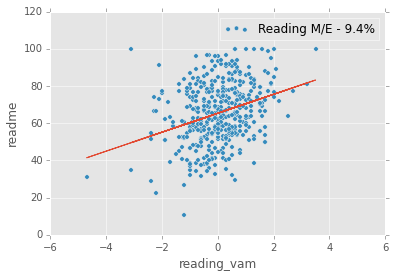

In [6]:
x = data['reading_vam']
y = data['readme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readme',label="Reading M/E - 9.4%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     39.54
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           7.77e-10
Time:                        23:21:48   Log-Likelihood:                -1839.2
No. Observations:                 440   AIC:                             3682.
Df Residuals:                     438   BIC:                             3691.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     19.6437      0.757     25.957      0.000        18.156    21.131
x              4.8349      0.769      6.288      0.000         3.324     6.346
==============================================================================
Omnibus:                      194.506   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              854.406
Skew:                           1.957   Prob(JB):                    2.94e-186
Kurtosis:                       8.594   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

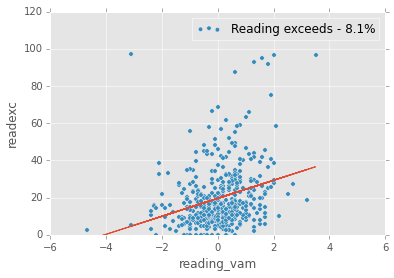

In [4]:
x = data['reading_vam']
y = data['readexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readexc',label="Reading exceeds - 8.1%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2577
Date:                Sat, 15 Aug 2015   Prob (F-statistic):              0.612
Time:                        23:06:25   Log-Likelihood:                -1659.9
No. Observations:                 440   AIC:                             3324.
Df Residuals:                     438   BIC:                             3332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     45.7218      0.503     90.821      0.000        44.732    46.711
x              0.2596      0.511      0.508      0.612        -0.746     1.265
==============================================================================
Omnibus:                       77.677   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.565
Skew:                          -0.922   Prob(JB):                     3.37e-38
Kurtosis:                       5.452   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

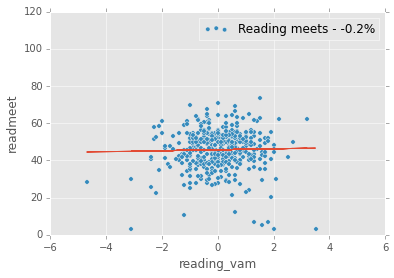

In [9]:
x = data['reading_vam']
y = data['readmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readmeet',label="Reading meets - -0.2%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     46.41
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           3.17e-11
Time:                        23:06:39   Log-Likelihood:                -1820.7
No. Observations:                 440   AIC:                             3645.
Df Residuals:                     438   BIC:                             3654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.3627      0.726     47.358      0.000        32.937    35.789
x             -5.0224      0.737     -6.813      0.000        -6.471    -3.574
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.762
Skew:                          -0.041   Prob(JB):                        0.683
Kurtosis:                       2.814   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

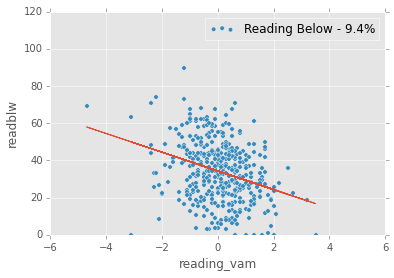

In [10]:
x = data['reading_vam']
y = data['readblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readblw',label="Reading Below - 9.4%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.621
Date:                Sat, 15 Aug 2015   Prob (F-statistic):             0.0321
Time:                        23:07:09   Log-Likelihood:                -480.73
No. Observations:                 440   AIC:                             965.5
Df Residuals:                     438   BIC:                             973.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2722      0.035      7.884      0.000         0.204     0.340
x             -0.0754      0.035     -2.150      0.032        -0.144    -0.006
==============================================================================
Omnibus:                      271.122   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1587.905
Skew:                           2.809   Prob(JB):                         0.00
Kurtosis:                      10.420   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

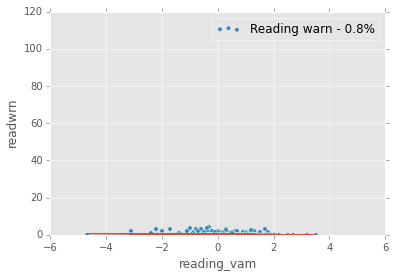

In [11]:
x = data['reading_vam']
y = data['readwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readwrn',label="Reading warn - 0.8%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     39.00
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.00e-09
Time:                        23:08:26   Log-Likelihood:                -1789.9
No. Observations:                 440   AIC:                             3584.
Df Residuals:                     438   BIC:                             3592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     75.2277      0.676    111.310      0.000        73.899    76.556
x              4.1972      0.672      6.245      0.000         2.876     5.518
==============================================================================
Omnibus:                       19.865   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.354
Skew:                          -0.531   Prob(JB):                     2.31e-05
Kurtosis:                       3.188   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

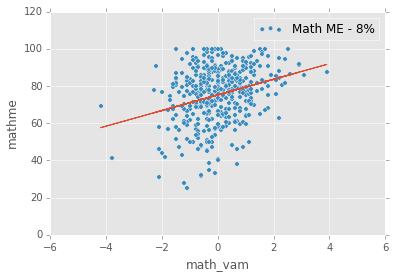

In [12]:
x = data['math_vam']
y = data['mathme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()
#print(lm.params.Intercept)
#print(lm.params.x)
#print(lm.params)

data.plot(kind='scatter', x='math_vam', y='mathme',label="Math ME - 8%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     21.02
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           5.95e-06
Time:                        23:08:39   Log-Likelihood:                -1734.3
No. Observations:                 440   AIC:                             3473.
Df Residuals:                     438   BIC:                             3481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.4566      0.596     17.555      0.000         9.286    11.627
x              2.7155      0.592      4.584      0.000         1.551     3.880
==============================================================================
Omnibus:                      258.513   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1768.652
Skew:                           2.547   Prob(JB):                         0.00
Kurtosis:                      11.398   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

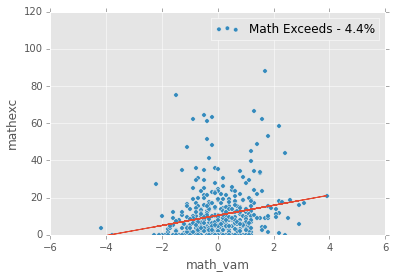

In [13]:
x = data['math_vam']
y = data['mathexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathexc',label="Math Exceeds - 4.4%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     6.561
Date:                Sat, 15 Aug 2015   Prob (F-statistic):             0.0108
Time:                        23:08:54   Log-Likelihood:                -1724.2
No. Observations:                 440   AIC:                             3452.
Df Residuals:                     438   BIC:                             3461.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     64.7727      0.582    111.272      0.000        63.629    65.917
x              1.4828      0.579      2.561      0.011         0.345     2.621
==============================================================================
Omnibus:                       50.377   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.779
Skew:                          -0.827   Prob(JB):                     1.91e-15
Kurtosis:                       3.981   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

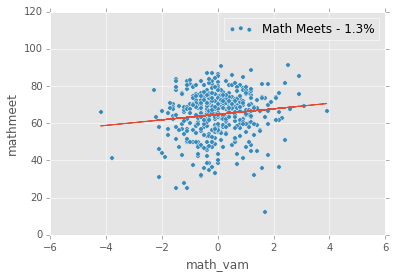

In [14]:
x = data['math_vam']
y = data['mathmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathmeet',label="Math Meets - 1.3%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     40.10
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           5.98e-10
Time:                        23:09:21   Log-Likelihood:                -1756.7
No. Observations:                 440   AIC:                             3517.
Df Residuals:                     438   BIC:                             3525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     23.4565      0.627     37.433      0.000        22.225    24.688
x             -3.9463      0.623     -6.333      0.000        -5.171    -2.722
==============================================================================
Omnibus:                       18.541   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.693
Skew:                           0.501   Prob(JB):                     5.29e-05
Kurtosis:                       3.268   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

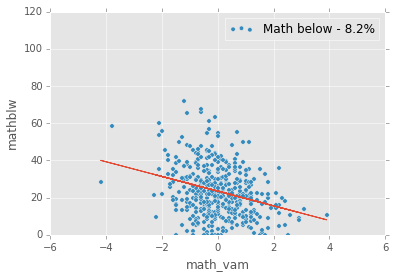

In [15]:
x = data['math_vam']
y = data['mathblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathblw',label="Math below - 8.2%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.818
Date:                Sat, 15 Aug 2015   Prob (F-statistic):             0.0163
Time:                        23:09:39   Log-Likelihood:                -973.30
No. Observations:                 440   AIC:                             1951.
Df Residuals:                     438   BIC:                             1959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.3168      0.106     12.465      0.000         1.109     1.524
x             -0.2534      0.105     -2.412      0.016        -0.460    -0.047
==============================================================================
Omnibus:                      258.445   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.473
Skew:                           2.555   Prob(JB):                         0.00
Kurtosis:                      11.283   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

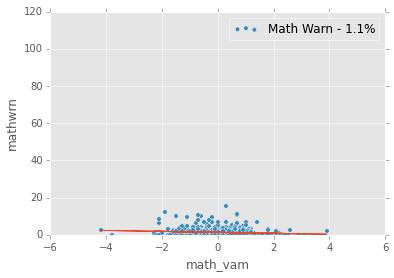

In [16]:
x = data['math_vam']
y = data['mathwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathwrn',label="Math Warn - 1.1%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()